In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("data.csv", index_col="year")

In [7]:
df

,democracy,corruption,peace,economic,press
year,,,,,
2010,4.26,21,2.189,50.3,49.90
2011,3.92,24,2.220,50.5,66.00
2012,3.74,28,2.175,50.5,66.00
2013,3.59,28,2.167,51.1,56.58
2014,3.39,27,2.541,51.9,57.22
2015,3.31,29,2.522,52.1,55.03
2016,3.24,29,2.596,50.6,50.97
2017,3.17,29,2.738,57.1,50.55
2018,2.94,28,2.861,58.2,50.04


In [8]:
df.describe()

,democracy,corruption,peace,economic,press
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3.346154,27.538462,2.579692,54.600000,53.320769
std,0.482572,2.436370,0.301500,4.305229,7.179497
min,2.280000,21.000000,2.167000,50.300000,38.820000
25%,3.170000,28.000000,2.220000,50.600000,50.040000
50%,3.310000,28.000000,2.596000,52.100000,51.080000
75%,3.590000,29.000000,2.870000,58.200000,56.580000
max,4.260000,30.000000,2.898000,61.500000,66.000000


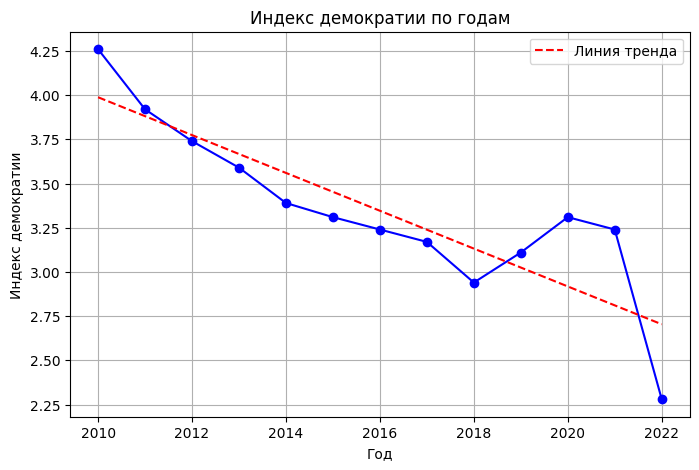

In [9]:
years = df.index
democracy = df['democracy']

plt.figure(figsize=(8, 5))
plt.plot(democracy, marker='o', linestyle='-', color='b')
plt.title('Индекс демократии по годам')
plt.xlabel('Год')
plt.ylabel('Индекс демократии')
plt.grid(True)

coefficients = np.polyfit(years, democracy, 1)
trend_line = coefficients[0] * years + coefficients[1]
plt.plot(years, trend_line, linestyle='--', color='r', label='Линия тренда')

plt.legend()

plt.show()

/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


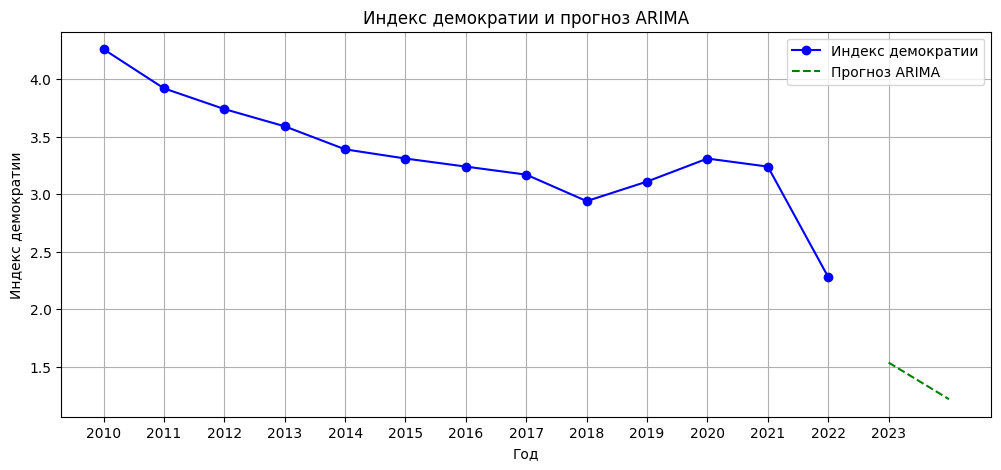

In [10]:
years = df.index
democracy = df['democracy']

time_series = pd.Series(democracy, index=years)
time_series.index = pd.to_datetime(time_series.index, format='%Y')
time_series = time_series.sort_index()

model = sm.tsa.ARIMA(time_series, order=(1, 1, 1))
results = model.fit()

forecast = results.forecast(steps=2)
future_years = years.max() + np.arange(1, 3)

plt.figure(figsize=(12, 5))
plt.plot(democracy, marker='o', linestyle='-', color='b', label='Индекс демократии')
plt.plot(future_years, forecast, linestyle='--', color='g', label='Прогноз ARIMA')

plt.xticks(np.arange(years.min(), future_years.max()))

plt.title('Индекс демократии и прогноз ARIMA')
plt.xlabel('Год')
plt.ylabel('Индекс демократии')
plt.grid(True)

plt.legend()

plt.show()

In [20]:
y = df['democracy'].to_list()

independent_variables = ['corruption', 'peace', 'economic', 'press']

for variable in independent_variables:
    X = df[variable].to_list()
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    print(f"Регрессия для зависимой переменной 'democracy' и независимой переменной '{variable}':")
    print(model.summary())
    print("\n")

Регрессия для зависимой переменной 'democracy' и независимой переменной 'corruption':
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     8.240
Date:                Fri, 13 Oct 2023   Prob (F-statistic):             0.0152
Time:                        17:51:14   Log-Likelihood:                -4.8197
No. Observations:                  13   AIC:                             13.64
Df Residuals:                      11   BIC:                             14.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/sacmi5/D/data_lr1/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


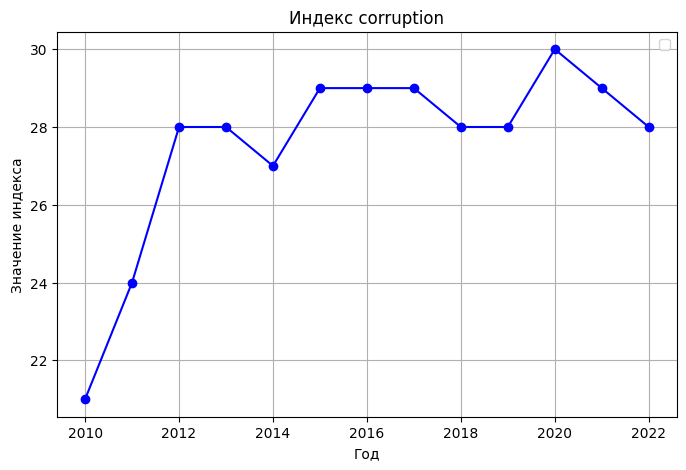

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


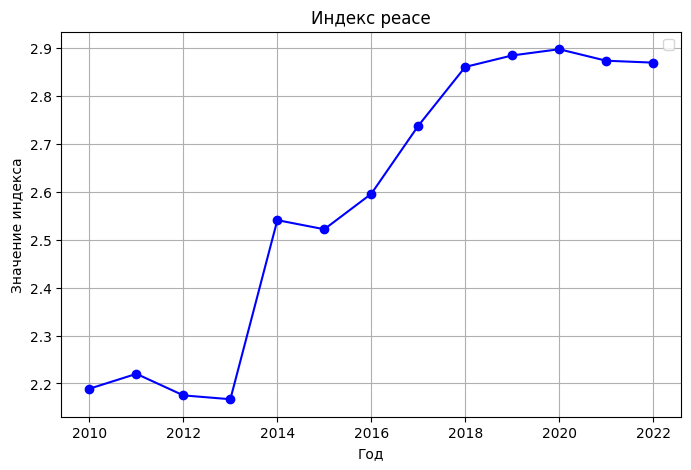

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


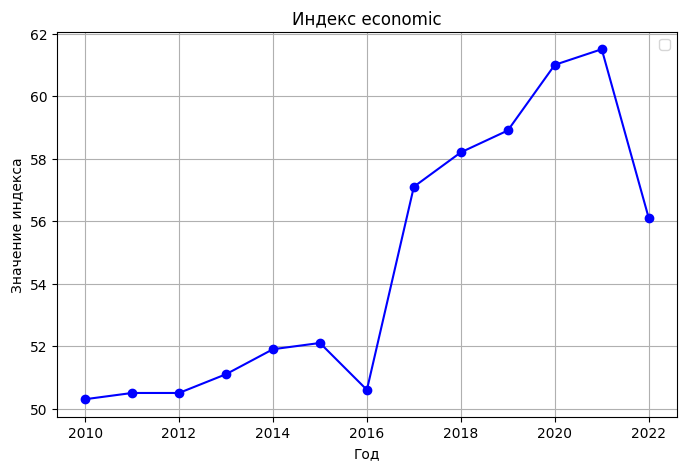

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


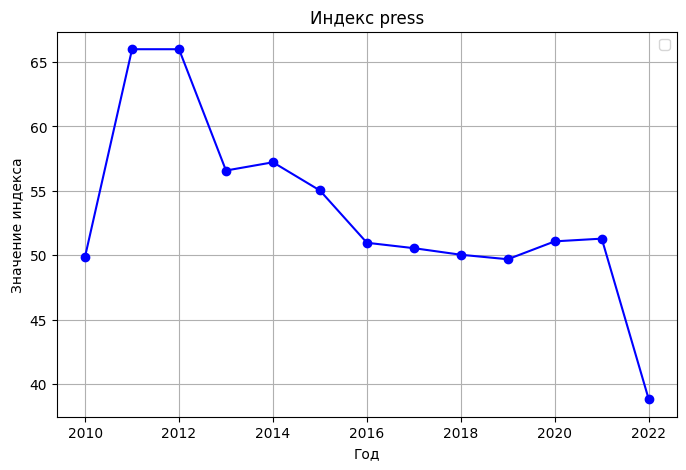

In [15]:
independent_variables = ['corruption', 'peace', 'economic', 'press']

for variable in independent_variables:
    plt.figure(figsize=(8, 5))
    plt.plot(df[variable], marker='o', linestyle='-', color='b')
    plt.title(f"Индекс {variable}")
    plt.xlabel('Год')
    plt.ylabel('Значение индекса')
    plt.grid(True)

    plt.legend()

    plt.show()